<a class="reference external" href="https://jupyter.designsafe-ci.org/hub/user-redirect/lab/tree/CommunityData/Training/Computational-Workflows-on-DesignSafe/Jupyter_Notebooks/Jupyter_Notebooks_Tapis/tapis_getJobOutData_AccessData.ipynb" target="_blank">
<img alt="Try on DesignSafe" src="https://raw.githubusercontent.com/DesignSafe-Training/pinn/main/DesignSafe-Badge.svg" /></a>

# Access Output Data

by Silvia Mazzoni, DesignSafe, 2025

You can use tapis to obtain the job metadata, and, hence, the path to the archived output files.
You can, therefore, manage those files.

## Configure Python

In [1]:
import os,sys
PathOpsUtils = os.path.expanduser('~/CommunityData/Training/Computational-Workflows-on-DesignSafe/OpsUtils')
if not PathOpsUtils in sys.path: sys.path.append(PathOpsUtils)
from OpsUtils import OpsUtils

Using local utilities library


## Connect to Tapis

In [2]:
t=OpsUtils.connect_tapis()

 -- Checking Tapis token --
 Token loaded from file. Token is still valid!
 Token expires at: 2025-08-21T02:49:32+00:00
 Token expires in: 3:38:26.610025
-- LOG IN SUCCESSFUL! --


### User Input: job id

In [3]:
jobUuid = '4dfa35e1-15cd-48fd-a090-f348544dee1f-007'

## Use a function to get the job metadata.

In [4]:
OpsUtils.show_text_file_in_accordion(PathOpsUtils,['get_tapis_job_metadata.py'])

In [5]:
JobMetadata = OpsUtils.get_tapis_job_metadata(t,jobUuid)

Accordion(children=(Output(),), selected_index=0, titles=('Job Metadata   (4dfa35e1-15cd-48fd-a090-f348544dee1…

In [6]:
archiveSystemDir_out = JobMetadata['archiveSystemDir_out']

# check that it exists:
print('path exists:',os.path.exists(archiveSystemDir_out))

path exists: True


## Visualize Data
this is the same process as what we had done when we presented the web-portal submit

---
## 4. get base path for output data from posted path:
Different systems in DesignSafe have different root paths...(bummer, yah)

In [7]:
basePath = archiveSystemDir_out

---
## 5. Plot some analysis results
for any of the above analyses

In [8]:
import matplotlib.pyplot as plt
import numpy

In [9]:
#pick any case
dataDir = f'{basePath}/DataTCLmp'
Lcol = 300

In [10]:
print('dataDir',dataDir)
# list some files:
os.system(f'ls {dataDir}/*Lcol{Lcol}.out')

dataDir /home/jupyter/MyData/tapis-jobs-archive/2025-05-07Z/opensees-mp-s3-latest_2025-05-07T22:13:08-4dfa35e1-15cd-48fd-a090-f348544dee1f-007/inputDirectory/DataTCLmp
/home/jupyter/MyData/tapis-jobs-archive/2025-05-07Z/opensees-mp-s3-latest_2025-05-07T22:13:08-4dfa35e1-15cd-48fd-a090-f348544dee1f-007/inputDirectory/DataTCLmp/DBase_Lcol300.out
/home/jupyter/MyData/tapis-jobs-archive/2025-05-07Z/opensees-mp-s3-latest_2025-05-07T22:13:08-4dfa35e1-15cd-48fd-a090-f348544dee1f-007/inputDirectory/DataTCLmp/DCol_Lcol300.out
/home/jupyter/MyData/tapis-jobs-archive/2025-05-07Z/opensees-mp-s3-latest_2025-05-07T22:13:08-4dfa35e1-15cd-48fd-a090-f348544dee1f-007/inputDirectory/DataTCLmp/DFree_Lcol300.out
/home/jupyter/MyData/tapis-jobs-archive/2025-05-07Z/opensees-mp-s3-latest_2025-05-07T22:13:08-4dfa35e1-15cd-48fd-a090-f348544dee1f-007/inputDirectory/DataTCLmp/FCol_Lcol300.out
/home/jupyter/MyData/tapis-jobs-archive/2025-05-07Z/opensees-mp-s3-latest_2025-05-07T22:13:08-4dfa35e1-15cd-48fd-a090-f348

0

/home/jupyter/MyData/tapis-jobs-archive/2025-05-07Z/opensees-mp-s3-latest_2025-05-07T22:13:08-4dfa35e1-15cd-48fd-a090-f348544dee1f-007/inputDirectory/DataTCLmp/DFree_Lcol300.out


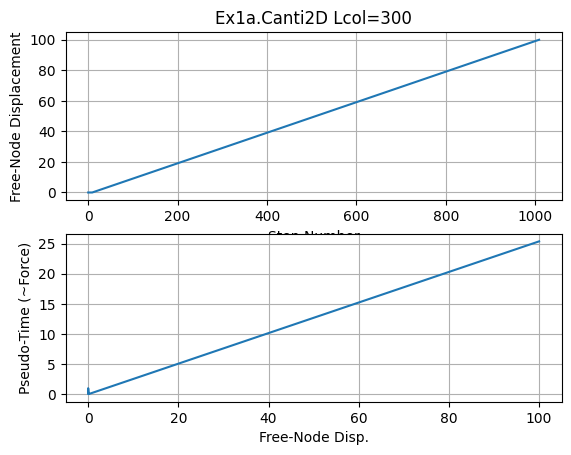

plot saved to /home/jupyter/MyData/tapis-jobs-archive/2025-05-07Z/opensees-mp-s3-latest_2025-05-07T22:13:08-4dfa35e1-15cd-48fd-a090-f348544dee1f-007/inputDirectory/DataTCLmp/Response_Lcol300.jpg
End of Run: Ex1a.Canti2D.Push.py.ipynb


In [11]:
plt.close('all')
fname3o = f'DFree_Lcol{Lcol}.out'
fname3 = f'{dataDir}/{fname3o}'
print(fname3)
dataDFree = numpy.loadtxt(fname3)
plt.subplot(211)
plt.title(f'Ex1a.Canti2D Lcol={Lcol}')
plt.grid(True)
plt.plot(dataDFree[:,1])
plt.xlabel('Step Number')
plt.ylabel('Free-Node Displacement')
plt.subplot(212)
plt.grid(True)
plt.plot(dataDFree[:,1],dataDFree[:,0])
plt.xlabel('Free-Node Disp.')
plt.ylabel('Pseudo-Time (~Force)')
plt.savefig(f'{dataDir}/Response.jpg')
plt.show()
print(f'plot saved to {dataDir}/Response_Lcol{Lcol}.jpg')
print('End of Run: Ex1a.Canti2D.Push.py.ipynb')


In [12]:
print('Done!')

Done!
